<a href="https://colab.research.google.com/github/jithsg/2-Pipeline/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

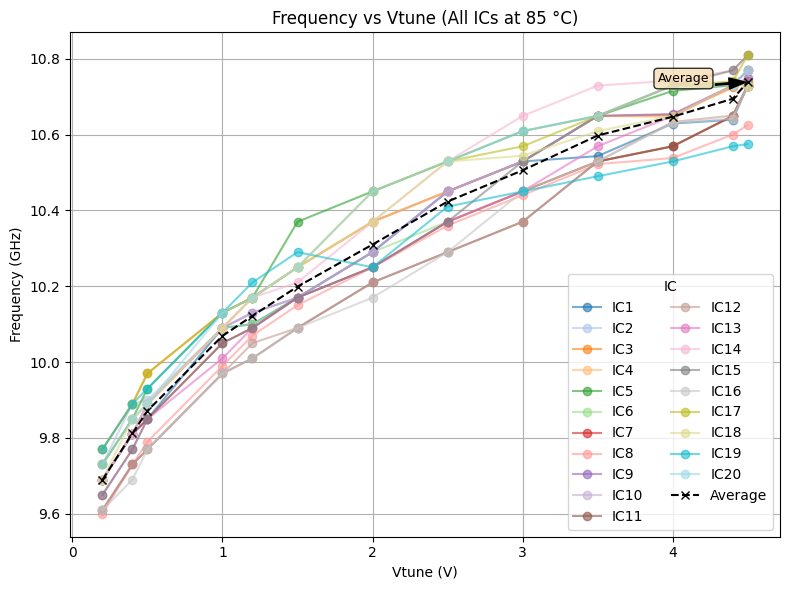

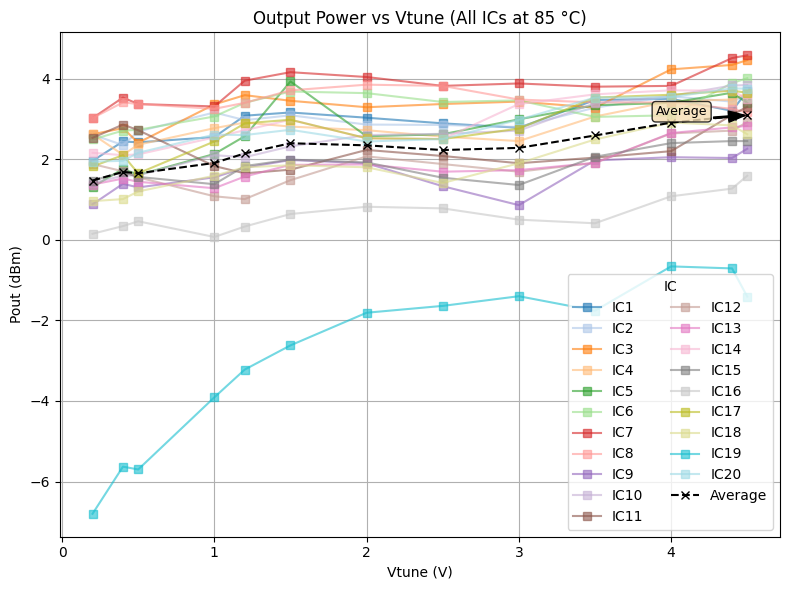

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. Load and Parse Excel File =====
# Ensure the file path is correct for your environment
file_path = "/content/85-deg.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1", header=None)

# Detect where each IC block begins
block_starts = df[df.iloc[:, 0] == "Vtune"].index.tolist()

records = []
for i, start in enumerate(block_starts):
    ic = f"IC{i+1}"
    # Extract data rows, convert to numeric, and drop any non-numeric values
    vtune = pd.to_numeric(df.iloc[start, 2:], errors="coerce").dropna().values
    freq = pd.to_numeric(df.iloc[start+1, 2:], errors="coerce").dropna().values
    pout = pd.to_numeric(df.iloc[start+2, 2:], errors="coerce").dropna().values

    # Ensure all arrays have the same length
    n = min(len(vtune), len(freq), len(pout))
    vtune, freq, pout = vtune[:n], freq[:n], pout[:n]

    for v, f, p in zip(vtune, freq, pout):
        records.append({"IC": ic, "Vtune(V)": v, "Frequency(GHz)": f, "Pout(dBm)": p})

# Create and sort the final DataFrame
df_all = pd.DataFrame(records).sort_values(["IC", "Vtune(V)"]).reset_index(drop=True)

# ===== 2. Sort ICs and Calculate Average =====
# Get the unique IC names that appear in the data
unique_ics_unsorted = df_all["IC"].unique()

# Sort the ICs based on the number part of the string for a chronological legend
ics = sorted(unique_ics_unsorted, key=lambda name: int(name[2:]))

# *** NEW: Calculate the average Frequency and Pout for each Vtune point ***
df_avg = df_all.groupby('Vtune(V)').agg(
    Avg_Frequency=('Frequency(GHz)', 'mean'),
    Avg_Pout=('Pout(dBm)', 'mean')
).reset_index()

# Generate a list of distinct colors corresponding to the sorted IC list
colors = plt.cm.tab20(np.linspace(0, 1, len(ics)))

# ===== 3. Plot: Frequency vs Vtune =====
plt.figure(figsize=(8, 6))

# Plot each individual IC
for ic, color in zip(ics, colors):
    g = df_all[df_all["IC"] == ic]
    plt.plot(g["Vtune(V)"], g["Frequency(GHz)"], marker="o", linestyle="-", label=ic, color=color, alpha=0.6)

# *** NEW: Plot the average line ***
plt.plot(df_avg['Vtune(V)'], df_avg['Avg_Frequency'],
         color='black', marker='x', linestyle='--',
         label='Average', zorder=3) # zorder brings the line to the front

# *** NEW: Add annotation for the average line ***
last_avg_point = df_avg.iloc[-1] # Get the last point for placing the text
plt.annotate(
    'Average',
    xy=(last_avg_point['Vtune(V)'], last_avg_point['Avg_Frequency']),
    xytext=(last_avg_point['Vtune(V)'] - 0.6, last_avg_point['Avg_Frequency']),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
)

plt.xlabel("Vtune (V)")
plt.ylabel("Frequency (GHz)")
plt.title("Frequency vs Vtune (All ICs at 85 °C)")
plt.grid(True)
plt.legend(title="IC", ncols=2)
plt.tight_layout()
plt.savefig("Freq_vs_Vtune_85deg_with_Avg.png", dpi=300)
plt.show()

# ===== 4. Plot: Pout vs Vtune =====
plt.figure(figsize=(8, 6))

# Plot each individual IC
for ic, color in zip(ics, colors):
    g = df_all[df_all["IC"] == ic]
    plt.plot(g["Vtune(V)"], g["Pout(dBm)"], marker="s", linestyle="-", label=ic, color=color, alpha=0.6)

# *** NEW: Plot the average line ***
plt.plot(df_avg['Vtune(V)'], df_avg['Avg_Pout'],
         color='black', marker='x', linestyle='--',
         label='Average', zorder=3)

# *** NEW: Add annotation for the average line ***
last_avg_point_pout = df_avg.iloc[-1]
plt.annotate(
    'Average',
    xy=(last_avg_point_pout['Vtune(V)'], last_avg_point_pout['Avg_Pout']),
    xytext=(last_avg_point_pout['Vtune(V)'] - 0.6, last_avg_point_pout['Avg_Pout']),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
)

plt.xlabel("Vtune (V)")
plt.ylabel("Pout (dBm)")
plt.title("Output Power vs Vtune (All ICs at 85 °C)")
plt.grid(True)
plt.legend(title="IC", ncols=2)
plt.tight_layout()
plt.savefig("Pout_vs_Vtune_85deg_with_Avg.png", dpi=300)
plt.show()

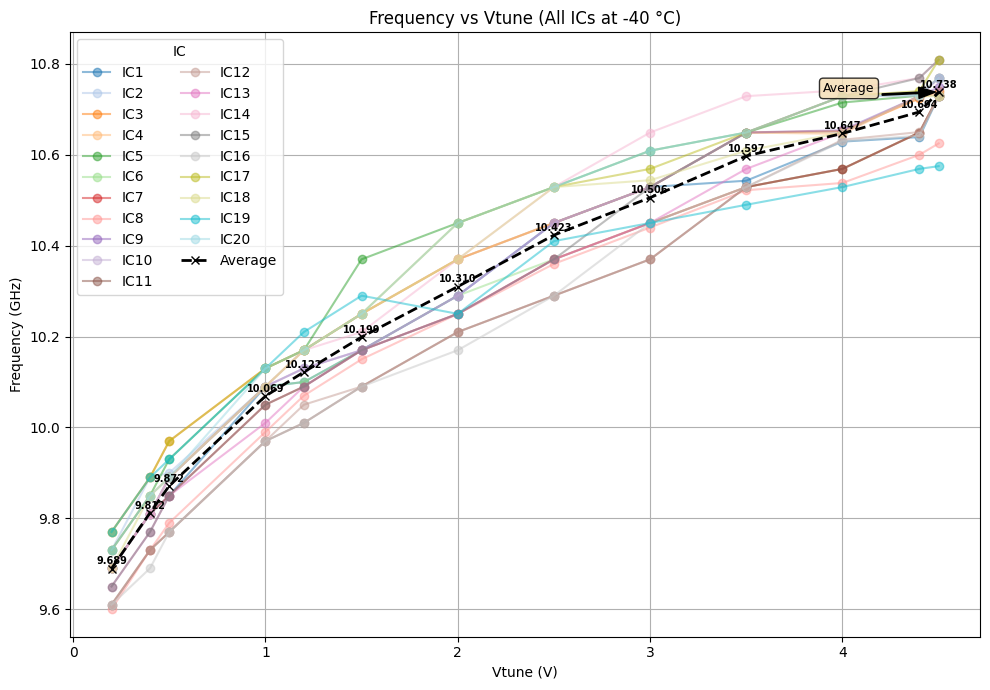

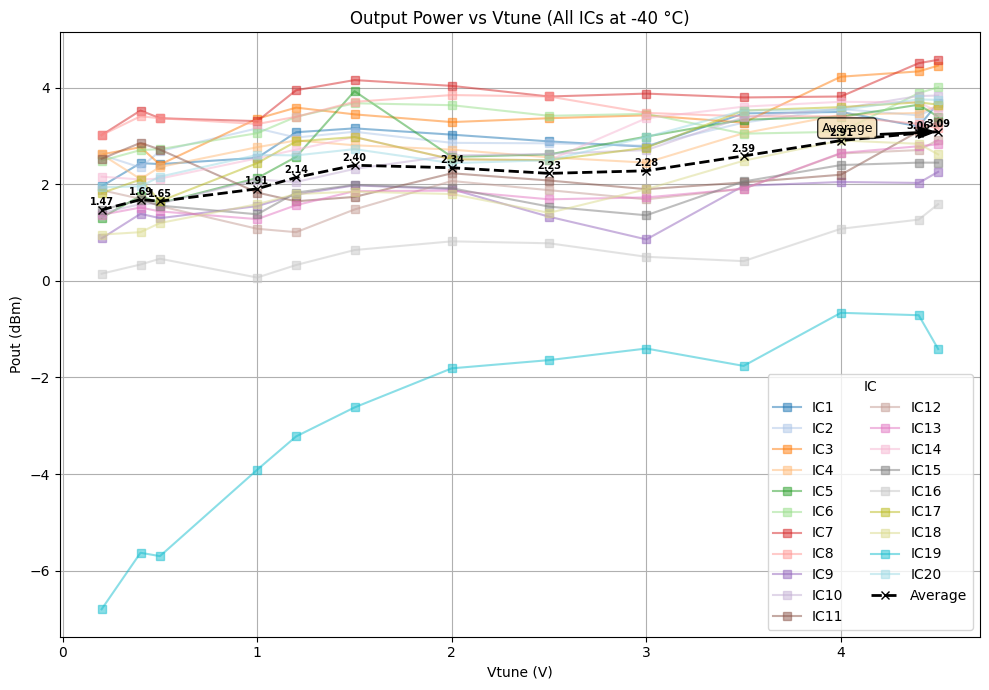

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. Load and Parse Excel File =====
# Ensure the file path is correct for your environment
file_path = "/content/40-deg.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1", header=None)

# Detect where each IC block begins
block_starts = df[df.iloc[:, 0] == "Vtune"].index.tolist()

records = []
for i, start in enumerate(block_starts):
    ic = f"IC{i+1}"
    # Extract data rows, convert to numeric, and drop any non-numeric values
    vtune = pd.to_numeric(df.iloc[start, 2:], errors="coerce").dropna().values
    freq = pd.to_numeric(df.iloc[start+1, 2:], errors="coerce").dropna().values
    pout = pd.to_numeric(df.iloc[start+2, 2:], errors="coerce").dropna().values

    # Ensure all arrays have the same length
    n = min(len(vtune), len(freq), len(pout))
    vtune, freq, pout = vtune[:n], freq[:n], pout[:n]

    for v, f, p in zip(vtune, freq, pout):
        records.append({"IC": ic, "Vtune(V)": v, "Frequency(GHz)": f, "Pout(dBm)": p})

# Create and sort the final DataFrame
df_all = pd.DataFrame(records).sort_values(["IC", "Vtune(V)"]).reset_index(drop=True)

# ===== 2. Sort ICs and Calculate Average =====
# Get the unique IC names that appear in the data
unique_ics_unsorted = df_all["IC"].unique()

# Sort the ICs based on the number part of the string for a chronological legend
ics = sorted(unique_ics_unsorted, key=lambda name: int(name[2:]))

# Calculate the average Frequency and Pout for each Vtune point
df_avg = df_all.groupby('Vtune(V)').agg(
    Avg_Frequency=('Frequency(GHz)', 'mean'),
    Avg_Pout=('Pout(dBm)', 'mean')
).reset_index()

# Generate a list of distinct colors corresponding to the sorted IC list
colors = plt.cm.tab20(np.linspace(0, 1, len(ics)))

# ===== 3. Plot: Frequency vs Vtune =====
plt.figure(figsize=(10, 7)) # Increased figure size for readability

# Plot each individual IC
for ic, color in zip(ics, colors):
    g = df_all[df_all["IC"] == ic]
    plt.plot(g["Vtune(V)"], g["Frequency(GHz)"], marker="o", linestyle="-", label=ic, color=color, alpha=0.5)

# Plot the average line
plt.plot(df_avg['Vtune(V)'], df_avg['Avg_Frequency'],
         color='black', marker='x', linestyle='--',
         label='Average', zorder=3, linewidth=2)

# Add annotation pointing to the average line
last_avg_point = df_avg.iloc[-1]
plt.annotate(
    'Average',
    xy=(last_avg_point['Vtune(V)'], last_avg_point['Avg_Frequency']),
    xytext=(last_avg_point['Vtune(V)'] - 0.6, last_avg_point['Avg_Frequency']),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
)

# *** NEW: Annotate each data point on the average line ***
for index, row in df_avg.iterrows():
    plt.text(x=row['Vtune(V)'],
             y=row['Avg_Frequency'] + 0.005, # Offset text slightly above the marker
             s=f"{row['Avg_Frequency']:.3f}", # Format value to 3 decimal places
             ha='center',
             va='bottom',
             fontsize=7,
             color='black',
             fontweight='bold')

plt.xlabel("Vtune (V)")
plt.ylabel("Frequency (GHz)")
plt.title("Frequency vs Vtune (All ICs at -40 °C)")
plt.grid(True)
plt.legend(title="IC", ncols=2)
plt.tight_layout()
plt.savefig("Freq_vs_Vtune_85deg_with_Avg_Points.png", dpi=300)
plt.show()

# ===== 4. Plot: Pout vs Vtune =====
plt.figure(figsize=(10, 7)) # Increased figure size for readability

# Plot each individual IC
for ic, color in zip(ics, colors):
    g = df_all[df_all["IC"] == ic]
    plt.plot(g["Vtune(V)"], g["Pout(dBm)"], marker="s", linestyle="-", label=ic, color=color, alpha=0.5)

# Plot the average line
plt.plot(df_avg['Vtune(V)'], df_avg['Avg_Pout'],
         color='black', marker='x', linestyle='--',
         label='Average', zorder=3, linewidth=2)

# Add annotation pointing to the average line
last_avg_point_pout = df_avg.iloc[-1]
plt.annotate(
    'Average',
    xy=(last_avg_point_pout['Vtune(V)'], last_avg_point_pout['Avg_Pout']),
    xytext=(last_avg_point_pout['Vtune(V)'] - 0.6, last_avg_point_pout['Avg_Pout']),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
)

# *** NEW: Annotate each data point on the average line ***
for index, row in df_avg.iterrows():
    plt.text(x=row['Vtune(V)'],
             y=row['Avg_Pout'] + 0.05, # Offset text slightly above the marker
             s=f"{row['Avg_Pout']:.2f}", # Format value to 2 decimal places
             ha='center',
             va='bottom',
             fontsize=7,
             color='black',
             fontweight='bold')

plt.xlabel("Vtune (V)")
plt.ylabel("Pout (dBm)")
plt.title("Output Power vs Vtune (All ICs at -40 °C)")
plt.grid(True)
plt.legend(title="IC", ncols=2)
plt.tight_layout()
plt.savefig("Pout_vs_Vtune_85deg_with_Avg_Points.png", dpi=300)
plt.show()

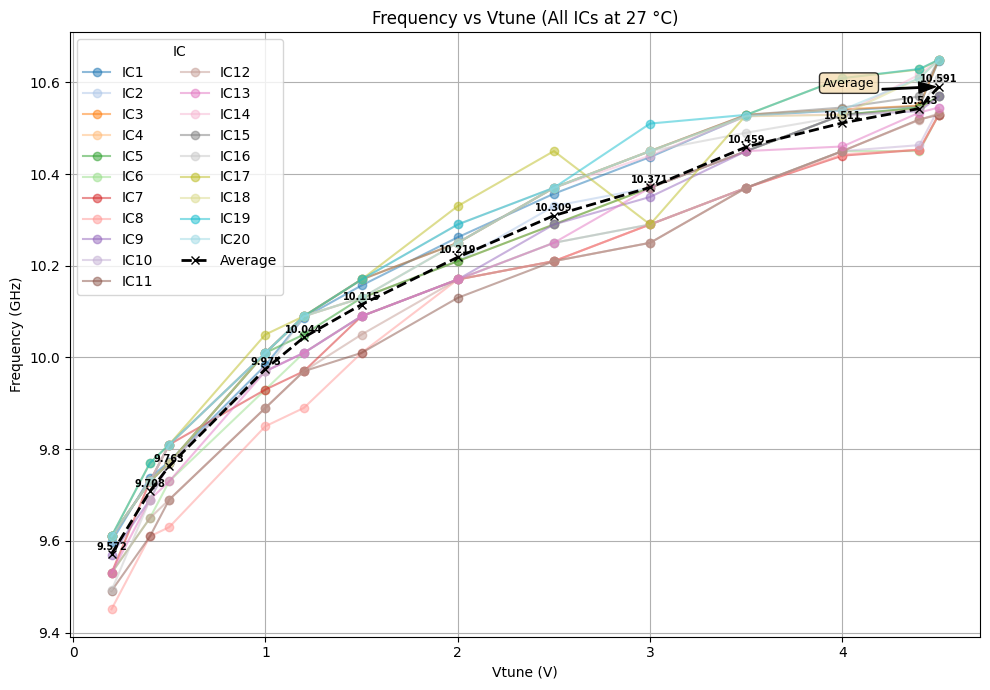

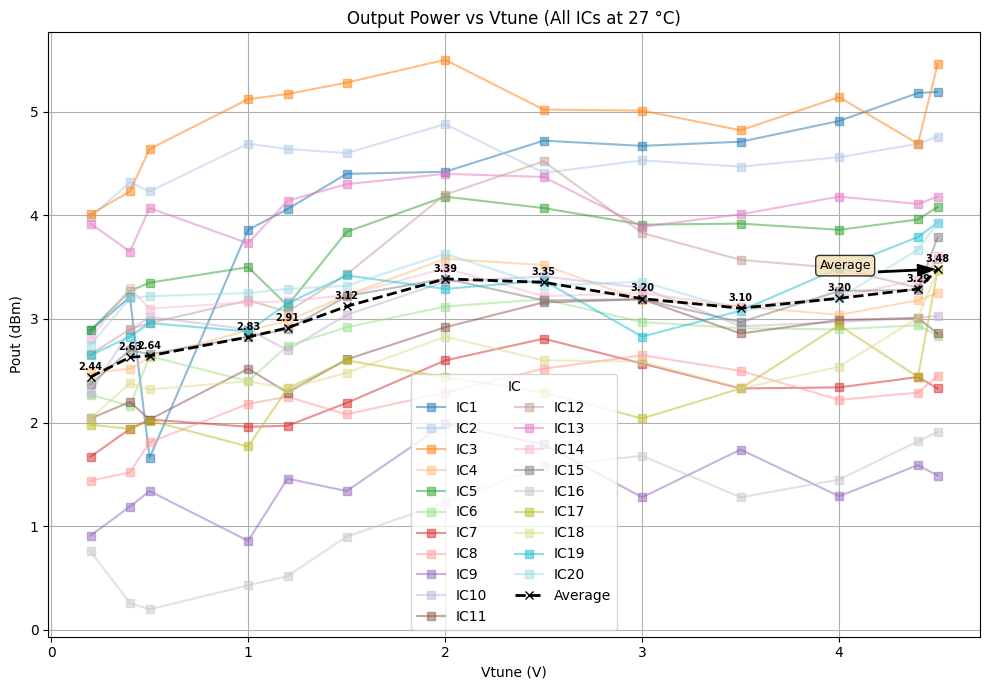

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. Load and Parse Excel File =====
# Ensure the file path is correct for your environment
file_path = "/content/27-deg.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1", header=None)

# Detect where each IC block begins
block_starts = df[df.iloc[:, 0] == "Vtune"].index.tolist()

records = []
for i, start in enumerate(block_starts):
    ic = f"IC{i+1}"
    # Extract data rows, convert to numeric, and drop any non-numeric values
    vtune = pd.to_numeric(df.iloc[start, 2:], errors="coerce").dropna().values
    freq = pd.to_numeric(df.iloc[start+1, 2:], errors="coerce").dropna().values
    pout = pd.to_numeric(df.iloc[start+2, 2:], errors="coerce").dropna().values

    # Ensure all arrays have the same length
    n = min(len(vtune), len(freq), len(pout))
    vtune, freq, pout = vtune[:n], freq[:n], pout[:n]

    for v, f, p in zip(vtune, freq, pout):
        records.append({"IC": ic, "Vtune(V)": v, "Frequency(GHz)": f, "Pout(dBm)": p})

# Create and sort the final DataFrame
df_all = pd.DataFrame(records).sort_values(["IC", "Vtune(V)"]).reset_index(drop=True)

# ===== 2. Sort ICs and Calculate Average =====
# Get the unique IC names that appear in the data
unique_ics_unsorted = df_all["IC"].unique()

# Sort the ICs based on the number part of the string for a chronological legend
ics = sorted(unique_ics_unsorted, key=lambda name: int(name[2:]))

# Calculate the average Frequency and Pout for each Vtune point
df_avg = df_all.groupby('Vtune(V)').agg(
    Avg_Frequency=('Frequency(GHz)', 'mean'),
    Avg_Pout=('Pout(dBm)', 'mean')
).reset_index()

# Generate a list of distinct colors corresponding to the sorted IC list
colors = plt.cm.tab20(np.linspace(0, 1, len(ics)))

# ===== 3. Plot: Frequency vs Vtune =====
plt.figure(figsize=(10, 7)) # Increased figure size for readability

# Plot each individual IC
for ic, color in zip(ics, colors):
    g = df_all[df_all["IC"] == ic]
    plt.plot(g["Vtune(V)"], g["Frequency(GHz)"], marker="o", linestyle="-", label=ic, color=color, alpha=0.5)

# Plot the average line
plt.plot(df_avg['Vtune(V)'], df_avg['Avg_Frequency'],
         color='black', marker='x', linestyle='--',
         label='Average', zorder=3, linewidth=2)

# Add annotation pointing to the average line
last_avg_point = df_avg.iloc[-1]
plt.annotate(
    'Average',
    xy=(last_avg_point['Vtune(V)'], last_avg_point['Avg_Frequency']),
    xytext=(last_avg_point['Vtune(V)'] - 0.6, last_avg_point['Avg_Frequency']),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
)

# *** NEW: Annotate each data point on the average line ***
for index, row in df_avg.iterrows():
    plt.text(x=row['Vtune(V)'],
             y=row['Avg_Frequency'] + 0.005, # Offset text slightly above the marker
             s=f"{row['Avg_Frequency']:.3f}", # Format value to 3 decimal places
             ha='center',
             va='bottom',
             fontsize=7,
             color='black',
             fontweight='bold')

plt.xlabel("Vtune (V)")
plt.ylabel("Frequency (GHz)")
plt.title("Frequency vs Vtune (All ICs at 27 °C)")
plt.grid(True)
plt.legend(title="IC", ncols=2)
plt.tight_layout()
plt.savefig("Freq_vs_Vtune_85deg_with_Avg_Points.png", dpi=300)
plt.show()

# ===== 4. Plot: Pout vs Vtune =====
plt.figure(figsize=(10, 7)) # Increased figure size for readability

# Plot each individual IC
for ic, color in zip(ics, colors):
    g = df_all[df_all["IC"] == ic]
    plt.plot(g["Vtune(V)"], g["Pout(dBm)"], marker="s", linestyle="-", label=ic, color=color, alpha=0.5)

# Plot the average line
plt.plot(df_avg['Vtune(V)'], df_avg['Avg_Pout'],
         color='black', marker='x', linestyle='--',
         label='Average', zorder=3, linewidth=2)

# Add annotation pointing to the average line
last_avg_point_pout = df_avg.iloc[-1]
plt.annotate(
    'Average',
    xy=(last_avg_point_pout['Vtune(V)'], last_avg_point_pout['Avg_Pout']),
    xytext=(last_avg_point_pout['Vtune(V)'] - 0.6, last_avg_point_pout['Avg_Pout']),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
)

# *** NEW: Annotate each data point on the average line ***
for index, row in df_avg.iterrows():
    plt.text(x=row['Vtune(V)'],
             y=row['Avg_Pout'] + 0.05, # Offset text slightly above the marker
             s=f"{row['Avg_Pout']:.2f}", # Format value to 2 decimal places
             ha='center',
             va='bottom',
             fontsize=7,
             color='black',
             fontweight='bold')

plt.xlabel("Vtune (V)")
plt.ylabel("Pout (dBm)")
plt.title("Output Power vs Vtune (All ICs at 27 °C)")
plt.grid(True)
plt.legend(title="IC", ncols=2)
plt.tight_layout()
plt.savefig("Pout_vs_Vtune_85deg_with_Avg_Points.png", dpi=300)
plt.show()

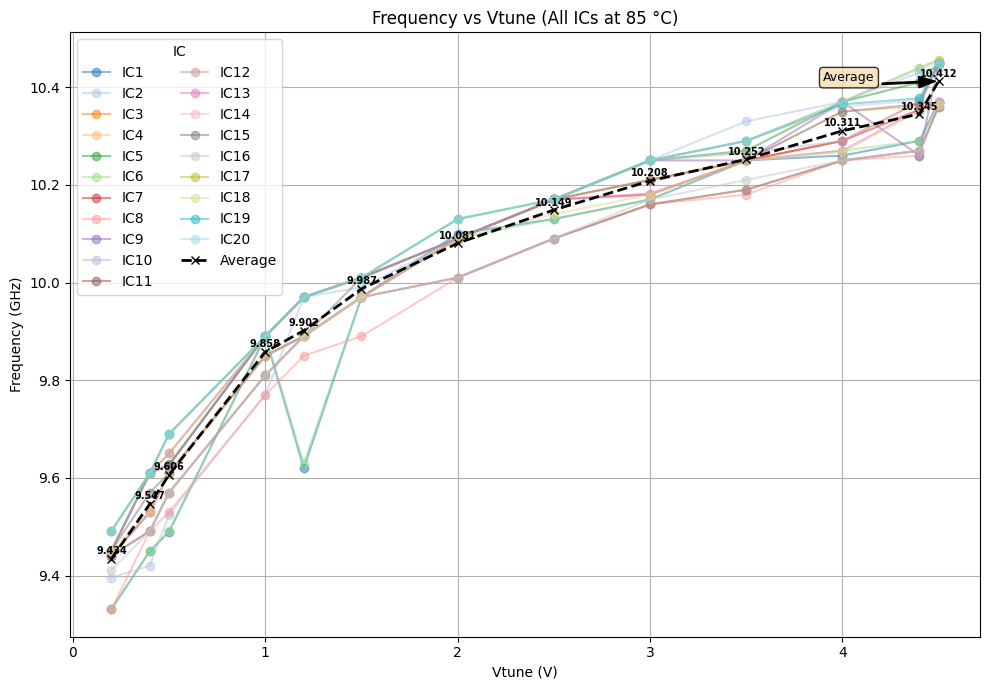

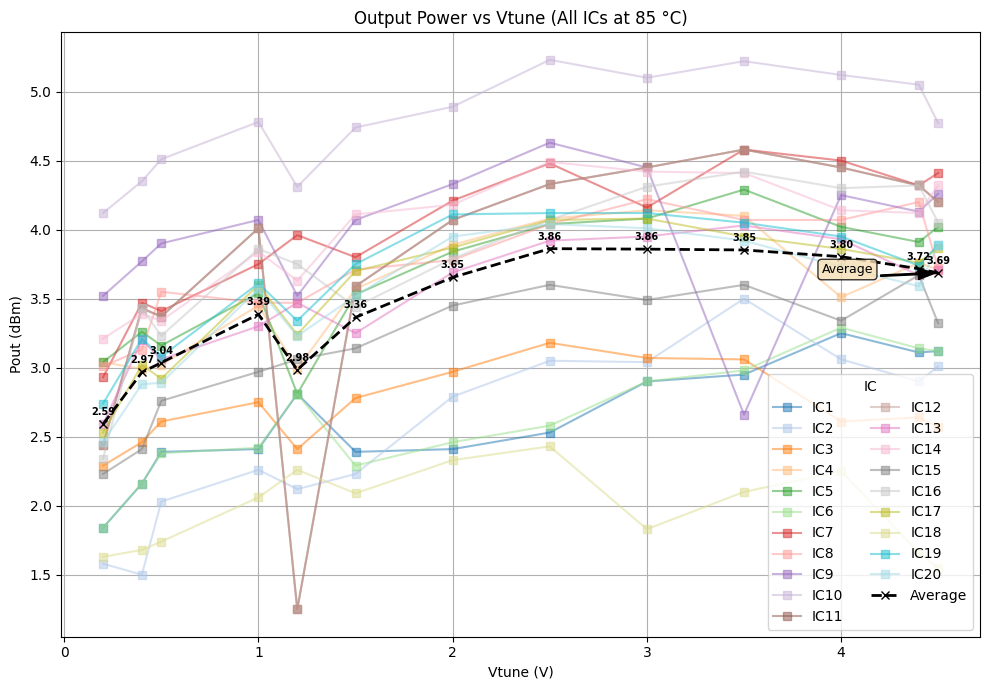

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. Load and Parse Excel File =====
# Ensure the file path is correct for your environment
file_path = "/content/85-deg.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1", header=None)

# Detect where each IC block begins
block_starts = df[df.iloc[:, 0] == "Vtune"].index.tolist()

records = []
for i, start in enumerate(block_starts):
    ic = f"IC{i+1}"
    # Extract data rows, convert to numeric, and drop any non-numeric values
    vtune = pd.to_numeric(df.iloc[start, 2:], errors="coerce").dropna().values
    freq = pd.to_numeric(df.iloc[start+1, 2:], errors="coerce").dropna().values
    pout = pd.to_numeric(df.iloc[start+2, 2:], errors="coerce").dropna().values

    # Ensure all arrays have the same length
    n = min(len(vtune), len(freq), len(pout))
    vtune, freq, pout = vtune[:n], freq[:n], pout[:n]

    for v, f, p in zip(vtune, freq, pout):
        records.append({"IC": ic, "Vtune(V)": v, "Frequency(GHz)": f, "Pout(dBm)": p})

# Create and sort the final DataFrame
df_all = pd.DataFrame(records).sort_values(["IC", "Vtune(V)"]).reset_index(drop=True)

# ===== 2. Sort ICs and Calculate Average =====
# Get the unique IC names that appear in the data
unique_ics_unsorted = df_all["IC"].unique()

# Sort the ICs based on the number part of the string for a chronological legend
ics = sorted(unique_ics_unsorted, key=lambda name: int(name[2:]))

# Calculate the average Frequency and Pout for each Vtune point
df_avg = df_all.groupby('Vtune(V)').agg(
    Avg_Frequency=('Frequency(GHz)', 'mean'),
    Avg_Pout=('Pout(dBm)', 'mean')
).reset_index()

# Generate a list of distinct colors corresponding to the sorted IC list
colors = plt.cm.tab20(np.linspace(0, 1, len(ics)))

# ===== 3. Plot: Frequency vs Vtune =====
plt.figure(figsize=(10, 7)) # Increased figure size for readability

# Plot each individual IC
for ic, color in zip(ics, colors):
    g = df_all[df_all["IC"] == ic]
    plt.plot(g["Vtune(V)"], g["Frequency(GHz)"], marker="o", linestyle="-", label=ic, color=color, alpha=0.5)

# Plot the average line
plt.plot(df_avg['Vtune(V)'], df_avg['Avg_Frequency'],
         color='black', marker='x', linestyle='--',
         label='Average', zorder=3, linewidth=2)

# Add annotation pointing to the average line
last_avg_point = df_avg.iloc[-1]
plt.annotate(
    'Average',
    xy=(last_avg_point['Vtune(V)'], last_avg_point['Avg_Frequency']),
    xytext=(last_avg_point['Vtune(V)'] - 0.6, last_avg_point['Avg_Frequency']),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
)

# *** NEW: Annotate each data point on the average line ***
for index, row in df_avg.iterrows():
    plt.text(x=row['Vtune(V)'],
             y=row['Avg_Frequency'] + 0.005, # Offset text slightly above the marker
             s=f"{row['Avg_Frequency']:.3f}", # Format value to 3 decimal places
             ha='center',
             va='bottom',
             fontsize=7,
             color='black',
             fontweight='bold')

plt.xlabel("Vtune (V)")
plt.ylabel("Frequency (GHz)")
plt.title("Frequency vs Vtune (All ICs at 85 °C)")
plt.grid(True)
plt.legend(title="IC", ncols=2)
plt.tight_layout()
plt.savefig("Freq_vs_Vtune_85deg_with_Avg_Points.png", dpi=300)
plt.show()

# ===== 4. Plot: Pout vs Vtune =====
plt.figure(figsize=(10, 7)) # Increased figure size for readability

# Plot each individual IC
for ic, color in zip(ics, colors):
    g = df_all[df_all["IC"] == ic]
    plt.plot(g["Vtune(V)"], g["Pout(dBm)"], marker="s", linestyle="-", label=ic, color=color, alpha=0.5)

# Plot the average line
plt.plot(df_avg['Vtune(V)'], df_avg['Avg_Pout'],
         color='black', marker='x', linestyle='--',
         label='Average', zorder=3, linewidth=2)

# Add annotation pointing to the average line
last_avg_point_pout = df_avg.iloc[-1]
plt.annotate(
    'Average',
    xy=(last_avg_point_pout['Vtune(V)'], last_avg_point_pout['Avg_Pout']),
    xytext=(last_avg_point_pout['Vtune(V)'] - 0.6, last_avg_point_pout['Avg_Pout']),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="black", lw=1, alpha=0.8)
)

# *** NEW: Annotate each data point on the average line ***
for index, row in df_avg.iterrows():
    plt.text(x=row['Vtune(V)'],
             y=row['Avg_Pout'] + 0.05, # Offset text slightly above the marker
             s=f"{row['Avg_Pout']:.2f}", # Format value to 2 decimal places
             ha='center',
             va='bottom',
             fontsize=7,
             color='black',
             fontweight='bold')

plt.xlabel("Vtune (V)")
plt.ylabel("Pout (dBm)")
plt.title("Output Power vs Vtune (All ICs at 85 °C)")
plt.grid(True)
plt.legend(title="IC", ncols=2)
plt.tight_layout()
plt.savefig("Pout_vs_Vtune_85deg_with_Avg_Points.png", dpi=300)
plt.show()

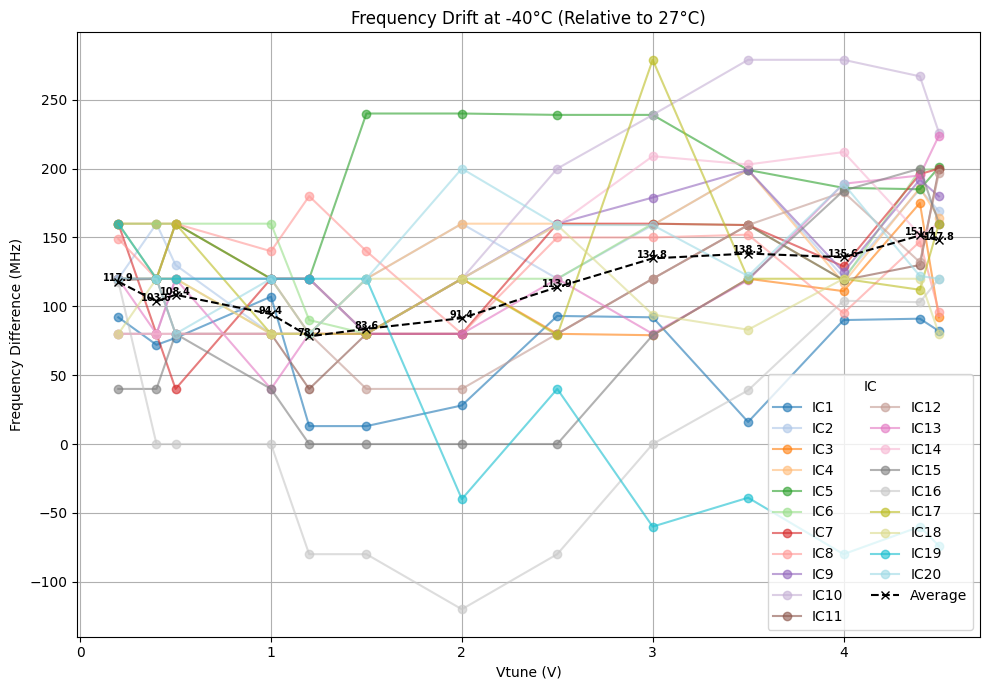

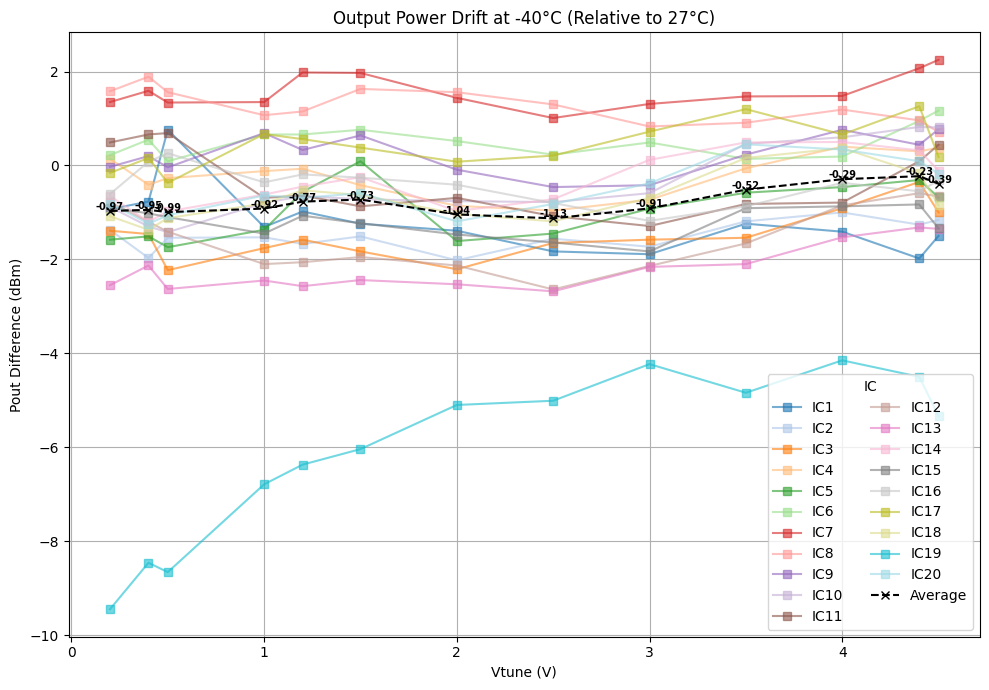

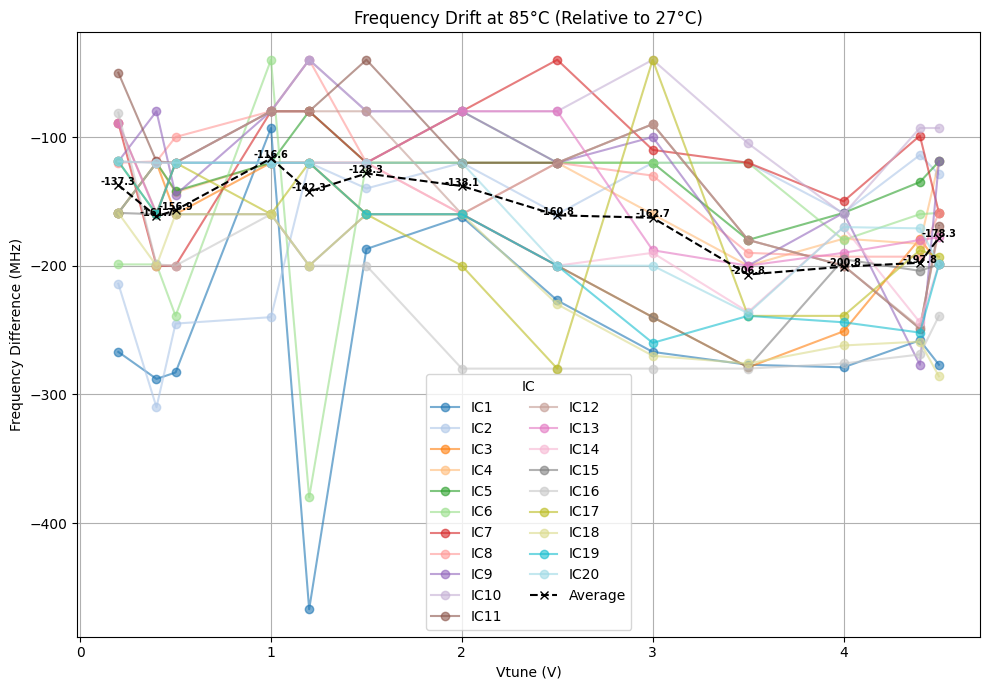

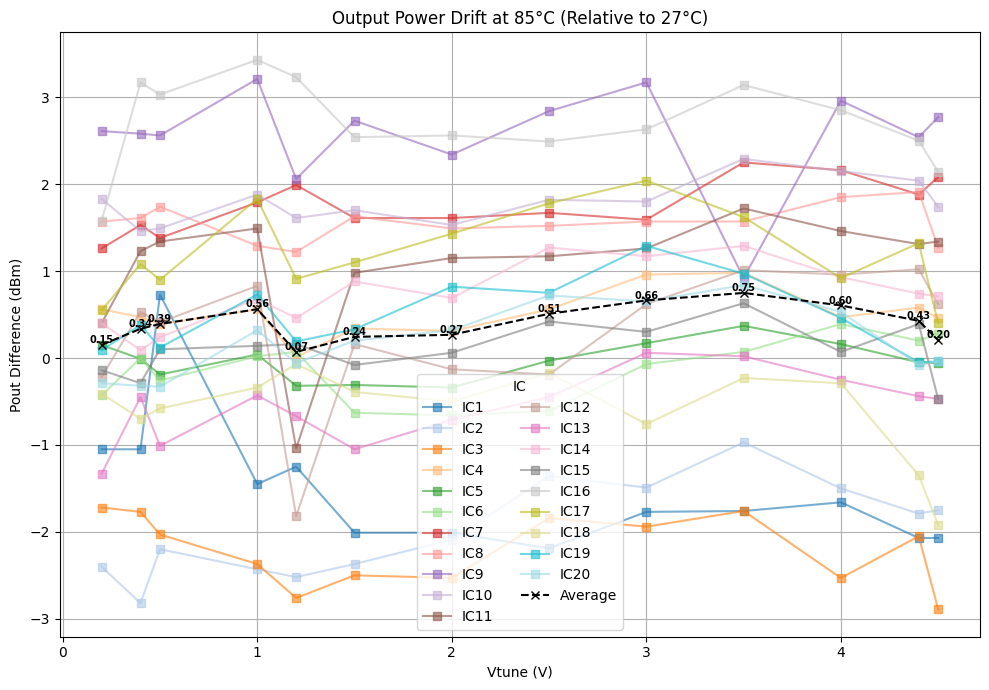

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_and_process_data(file_path, temperature):
    """Loads an Excel file, parses the IC data, and returns a DataFrame."""
    df = pd.read_excel(file_path, sheet_name="Sheet1", header=None)
    block_starts = df[df.iloc[:, 0] == "Vtune"].index.tolist()

    records = []
    for i, start in enumerate(block_starts):
        ic = f"IC{i+1}"
        vtune = pd.to_numeric(df.iloc[start, 2:], errors="coerce").dropna().values
        freq = pd.to_numeric(df.iloc[start+1, 2:], errors="coerce").dropna().values
        pout = pd.to_numeric(df.iloc[start+2, 2:], errors="coerce").dropna().values

        n = min(len(vtune), len(freq), len(pout))
        vtune, freq, pout = vtune[:n], freq[:n], pout[:n]

        for v, f, p in zip(vtune, freq, pout):
            records.append({
                "IC": ic,
                "Vtune(V)": v,
                "Frequency(GHz)": f,
                "Pout(dBm)": p,
                "Temperature(C)": temperature
            })

    return pd.DataFrame(records)

# ===== 1. Load Data for All Temperatures =====
# Update file paths as needed
df_27 = load_and_process_data("/content/27-deg.xlsx", 27)
df_neg_40 = load_and_process_data("/content/40-deg.xlsx", -40)
df_85 = load_and_process_data("/content/85-deg.xlsx", 85)

# ===== 2. Calculate Differences from the 27°C Baseline =====

# Set index for easy alignment
df_27_base = df_27.set_index(['IC', 'Vtune(V)'])

def calculate_diff(df_temp, df_base):
    """Calculates the difference between a temperature DataFrame and the baseline."""
    df_temp_indexed = df_temp.set_index(['IC', 'Vtune(V)'])

    # Only subtract the relevant numeric columns
    cols_to_diff = ['Frequency(GHz)', 'Pout(dBm)']
    df_diff = df_temp_indexed[cols_to_diff] - df_base[cols_to_diff]

    df_diff.rename(columns={"Frequency(GHz)": "Freq_Diff(MHz)", "Pout(dBm)": "Pout_Diff(dBm)"}, inplace=True)

    # Convert Frequency difference from GHz to MHz for better readability
    df_diff["Freq_Diff(MHz)"] *= 1000

    return df_diff.reset_index()

df_diff_neg_40 = calculate_diff(df_neg_40, df_27_base)
df_diff_85 = calculate_diff(df_85, df_27_base)

# *** FIXED: Explicitly specify which columns to average ***
avg_diff_neg_40 = df_diff_neg_40.groupby('Vtune(V)').agg({
    'Freq_Diff(MHz)': 'mean',
    'Pout_Diff(dBm)': 'mean'
}).reset_index()

avg_diff_85 = df_diff_85.groupby('Vtune(V)').agg({
    'Freq_Diff(MHz)': 'mean',
    'Pout_Diff(dBm)': 'mean'
}).reset_index()


# Get ICs in chronological order for plotting
ics = sorted(df_27["IC"].unique(), key=lambda name: int(name[2:]))
colors = plt.cm.tab20(np.linspace(0, 1, len(ics)))

# ===== 3. Plotting Function =====

def plot_differences(df_diff, avg_diff, temperature_str):
    """A reusable function to create the difference plots."""

    # --- Frequency Difference Plot ---
    plt.figure(figsize=(10, 7))
    for ic, color in zip(ics, colors):
        g = df_diff[df_diff["IC"] == ic]
        plt.plot(g["Vtune(V)"], g["Freq_Diff(MHz)"], marker="o", linestyle="-", label=ic, color=color, alpha=0.6)

    # Plot average difference
    plt.plot(avg_diff['Vtune(V)'], avg_diff['Freq_Diff(MHz)'], color='black', marker='x', linestyle='--', label='Average', zorder=3)

    # Annotate average points
    for _, row in avg_diff.iterrows():
        plt.text(row['Vtune(V)'], row['Freq_Diff(MHz)'] + 0.2, f"{row['Freq_Diff(MHz)']:.1f}", ha='center', fontsize=7, fontweight='bold')

    plt.xlabel("Vtune (V)")
    plt.ylabel("Frequency Difference (MHz)")
    plt.title(f"Frequency Drift at {temperature_str} (Relative to 27°C)")
    plt.grid(True)
    plt.legend(title="IC", ncols=2)
    plt.tight_layout()
    plt.savefig(f"Freq_Drift_{temperature_str}.png", dpi=300)
    plt.show()

    # --- Pout Difference Plot ---
    plt.figure(figsize=(10, 7))
    for ic, color in zip(ics, colors):
        g = df_diff[df_diff["IC"] == ic]
        plt.plot(g["Vtune(V)"], g["Pout_Diff(dBm)"], marker="s", linestyle="-", label=ic, color=color, alpha=0.6)

    # Plot average difference
    plt.plot(avg_diff['Vtune(V)'], avg_diff['Pout_Diff(dBm)'], color='black', marker='x', linestyle='--', label='Average', zorder=3)

    # Annotate average points
    for _, row in avg_diff.iterrows():
        plt.text(row['Vtune(V)'], row['Pout_Diff(dBm)'] + 0.02, f"{row['Pout_Diff(dBm)']:.2f}", ha='center', fontsize=7, fontweight='bold')

    plt.xlabel("Vtune (V)")
    plt.ylabel("Pout Difference (dBm)")
    plt.title(f"Output Power Drift at {temperature_str} (Relative to 27°C)")
    plt.grid(True)
    plt.legend(title="IC", ncols=2)
    plt.tight_layout()
    plt.savefig(f"Pout_Drift_{temperature_str}.png", dpi=300)
    plt.show()

# ===== 4. Generate the Plots =====

plot_differences(df_diff_neg_40, avg_diff_neg_40,
                 "-40°C")
plot_differences(df_diff_85, avg_diff_85, "85°C")